In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression

In [26]:
help(mutual_info_regression)

Help on function mutual_info_regression in module sklearn.feature_selection._mutual_info:

mutual_info_regression(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
    Estimate mutual information for a continuous target variable.
    
    Mutual information (MI) [1]_ between two random variables is a non-negative
    value, which measures the dependency between the variables. It is equal
    to zero if and only if two random variables are independent, and higher
    values mean higher dependency.
    
    The function relies on nonparametric methods based on entropy estimation
    from k-nearest neighbors distances as described in [2]_ and [3]_. Both
    methods are based on the idea originally proposed in [4]_.
    
    It can be used for univariate features selection, read more in the
    :ref:`User Guide <univariate_feature_selection>`.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        Feature 

LSTMbayesdecodeData/Nh10/pcon0.3/seed0/deltat10/ypred_h.npy
LSTMbayesdecodeData/Nh10/pcon0.3/seed0/deltat50/ypred_h.npy


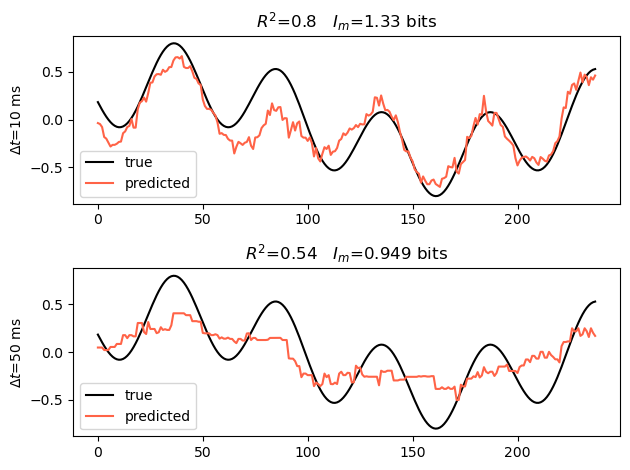

In [42]:
fig,ax = plt.subplots(2)

deltat=10
folder = 'LSTMbayesdecodeData/Nh10/pcon0.3/seed0/deltat%s/'%(deltat)
path = folder + 'ytest.npy'
ytrue = np.load(path)
layer = 'h'
path = folder + 'ypred_%s.npy'%layer
print(path)
ypred = np.load(path)
ax[0].plot(ytrue[:,0],color='black',label='true')
ax[0].plot(ypred[:,0],color='tomato',label='predicted')
ax[0].legend()

# compute r2
r2 = r2_score(ytrue,ypred)

# compute mi
Xp = ytrue.flatten()
X = np.reshape(Xp, (len(Xp),1))
y = ypred.flatten()
mi = mutual_info_regression(X,y)[0]/np.log(2)
ax[0].set_ylabel(f'$\Delta t$={deltat} ms')
title = f"$R^2$={r2:.2}   $I_m$={mi:.3} bits"
ax[0].set_title(title)

deltat=50
folder = 'LSTMbayesdecodeData/Nh10/pcon0.3/seed0/deltat%s/'%(deltat)
path = folder + 'ytest.npy'
ytrue = np.load(path)
layer = 'h'
path = folder + 'ypred_%s.npy'%layer
print(path)
ypred = np.load(path)
ax[1].plot(ytrue[:,0],color='black',label='true')
ax[1].plot(ypred[:,0],color='tomato',label='predicted')
ax[1].legend()

# compute r2
r2 = r2_score(ytrue,ypred)

# compute mi
Xp = ytrue.flatten()
X = np.reshape(Xp, (len(Xp),1))
y = ypred.flatten()
mi = mutual_info_regression(X,y)[0]/np.log(2)
ax[1].set_ylabel(f'$\Delta t$={deltat} ms')
title = f"$R^2$={r2:.2}   $I_m$={mi:.3} bits"
ax[1].set_title(title)
plt.tight_layout()
plt.show()